# Classification Model Evaluation

## Metrics

- **accuracy**: (TP + TN) / (TP + TN + FP + FN)
    
    - Easy to understand
    - Can be misleading when working with imbalanced class problems
    - Does not matter what your "positive" is... b/c the numerator is TP + TN.
  
  
  
  
- **precision**: TP / (TP + FP)
    - Use when FP is more costly than FN
    - e.g. spam filter

    
- **recall**: TP / (TP + FN)
    - Use when FN is more costly than FP
    - e.g. credit card fraud detection
    
### What do you care about?
- Minimizing false positives --> Precision
- Minimizing false negatives --> Recall
- Both Precision and Recall --> F1 score





## Examples:

Imagine you're bringing coffee to meeting, and you need to predict whether each person at the meeting will want a coffee or not. Which metric should you choose? It depends


Outcomes:

- TP: Buy a coffee for someone who will drink it
- TN: Don't buy a coffee for someone who wouldn't drink it anyway
- FP: Buy a coffee for someone who won't drink it
- FN: Don't buy a coffee for someone who wanted one


Scenarios

- lola: really good coffee, but super expensive
    - cost of a FP is higher than FN
    - precision is better here because buying a cup of coffee for someone who won't drink it is expensive
    - We want to be sure about our positive predictions
- taco cabana: bad coffee, but cheap
    - cost of a FN is higher than FP
    - recall because the coffee is cheap, its not bad to buy a cheap coffee for someone who won't drink it; worse to not get someone coffee who wanted it
- meeting with super important client
    - cost of FN is higher, because they might be offended if we dont' get them coffee
    - cost of FN == not signing a contract
    - recall

What if we just don't buy coffee or buy coffee for everyone? Baseline model

#### Confusion Matrix
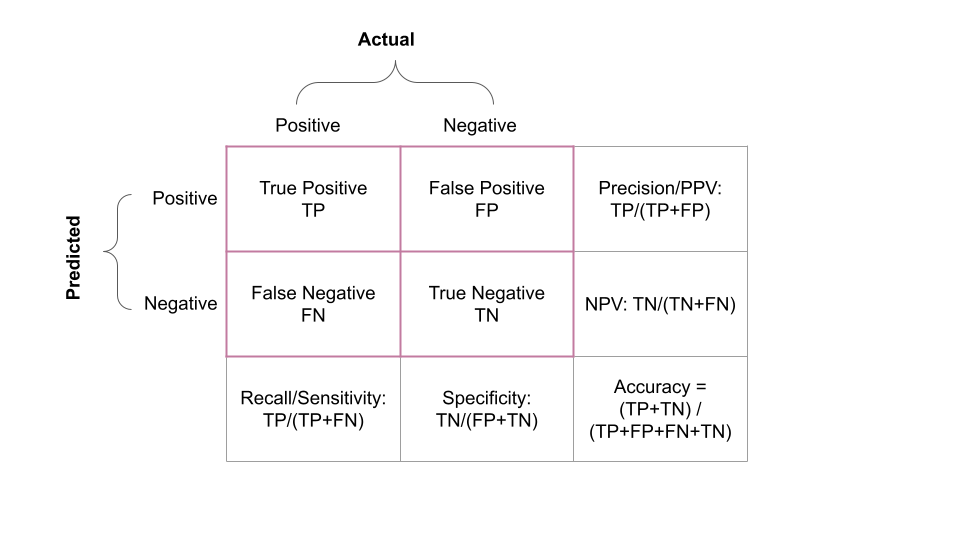

### Mini Exercise

Scenario: Build a classifier to predict whether a given face should unlock the iPhone.

- What is the positive and negative case?
- What are the possible outcomes?
- What are the costs of the outcomes?
- Which metric should we use?

Scenario: Predict whether an email is spam or not. Emails marked as spam skip the inbox and go to the spam folder.

- What is the positive and negative case?
- What are the possible outcomes?
- What are the costs of the outcomes?
- Which metric should we use?

Scenario: Predict whether an email is a phishing attempt. When we predict positive, show an additional banner warning the user that this might be a phishing email.

- What is the positive and negative case?
- What are the possible outcomes?
- What are the costs of the outcomes?
- Which metric should we use?

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'actual': ['coffee', 'no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'coffee'],
    'prediction': ['no coffee', 'no coffee', 'coffee', 'coffee', 'coffee', 'coffee', 'no coffee', 'no coffee'],
})
df

In [ ]:
# pd.crosstab(df.actual, df.prediction)
pd.crosstab(df.prediction, df.actual)

 Coffee - positive (1)  
 No-Coffee - negative (0)  
 
 
 True Positive: We predicted coffee, it actually was coffee (3)  
 True Negative: We predicted 'no-coffee' and it actually was 'no-coffee'  (2)  
 False Positive: We predicted 'coffee', but in reality it was 'no-coffee' (Type I error)  (1)  
 False Negative: We predicted 'no-coffee', but in reality it was 'coffee' (Type II error)  (2)



- **accuracy**: (TP + TN) / (TP + TN + FP + FN)
    - (3 + 2) / (3 + 2 + 1 + 2) = 62.5%

  
- **precision**: TP / (TP + FP)
    - 3 / (3 + 1) = 75%
   
   
- **recall**: TP / (TP + FN)
    - 3 / (3 + 2) = 60%
   

### Calculate Metrics manually using Pandas

<div style="background: rgba(0, 150, 0, .25); padding: 1em 3em;">
    <p style="font-weight: bold">Sidebar: Baseline Models</p>
    <p>A <em>baseline model</em> is a model that we can compare to in order to see if the models we are creating are worthwhile.</p>
    <p>Depending on the context, this can mean either an existing rule-based model created with domain knowlege, or a model that makes predictions without any knowledge of the independent variables.</p>
</div>

In [ ]:
# Which label (actual) appears most frequently in our dataset?
df.actual.value_counts()

In [ ]:
# create a new column called 'baseline_prediction'
# which is the most frequent label e.g. in this case 'coffee'

df['baseline_prediction'] = 'coffee'

In [ ]:
# Model and baseline accuracy:

model_accuracy = 
baseline_accuracy = 

print(f'model accuracy: {model_accuracy:.2%}')
print(f'baseline accuracy: {baseline_accuracy:.2%}')

In [ ]:
# Recall - calculate on subset of data
# only look at subset of actual positives (i.e actual == coffee)
subset = 
subset

In [ ]:
# calculate recall for model and baseline
model_recall = 
baseline_recall =  

print(f'model recall: {model_recall:.2%}')
print(f'baseline recall: {baseline_recall:.2%}')

In [ ]:
# Precision: # only look at the subset where we made positive prediction
# (i.e. prediction == 'coffee')

subset =
subset

In [ ]:
model_precision = (subset.actual == subset.prediction).mean()
print(f'model precision: {model_precision:.2%}')

In [ ]:
# Baseline Precision: # only look at the subset where we made positive prediction (i.e. prediction == 'coffee')

subset = 
baseline_precision = 
print(f'baseline precision: {baseline_precision:.2%}')

### Additional classification Metrics 

###  F-1 score 

- F1 score is the harmonic mean of precision and recall (why harmonic?)


$$ \text{F-1 score} = \frac{\text{2 * Precision * Recall}}{\text{Precision + Recall}} $$


- We want have high F1 score. This means we want both Precision and Recall to be high.

- Harmonic mean punishes the extreme values more i.e. to have high F1 score, it ensures that both precision and recall are high.

- Remember Arithmetic mean > Geometric Mean > Harmonic Mean

###  Area Under ROC Curve:
-  How well a model can classify binary outcomes
- A way to measure overall model performance for models that predict not just a class, but a probability as well.



### What does shape/AUC of ROC curve signifies ?
- The shape of an ROC curve changes when a model changes the way it classifies the two outcomes.

- The area measures *discrimination*. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
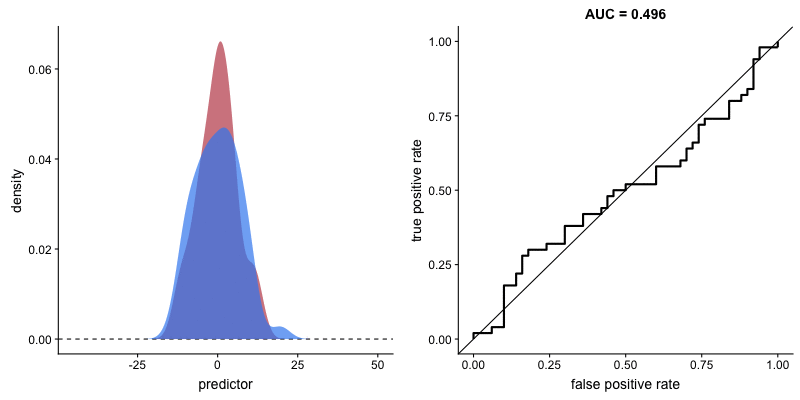

Animations source: https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif

### How is ROC curve generated?
- By varying the cut-off between what is considered positive vs negative

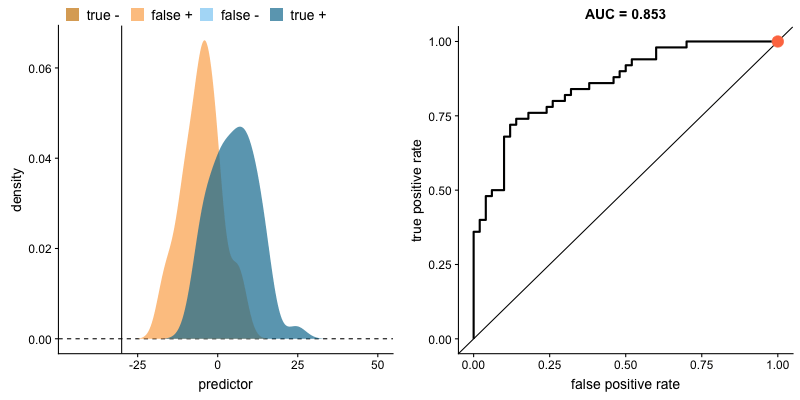

### Metrics using Sklearn 

In [ ]:
# import sklearn functions
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

### Bonus: Recognize Metric

You are a data-scientist at a bio-medical start-up company and working on developing rapid COVID test-kit. The test relies on number of inputs (e.g. patient's age, body temperature, BMI, symptoms along with some results from blood analysis) to make a prediction if patient is recently infected with coronavirus.

You demo your technology/test to FDA in hope of getting approval to sell the kits to general public. FDA asks you the following questions to assses your test-kit:

- "What is the probability that your test-kit will show positive result, if the patient is actually infected?"
- "If a patient tested positive using your test-kit, what is the probability that the patient is  actually infected?"
- "How good is your test in actually ruling out the infection. In other words, what is the probability that your test-kit will show negative result, if the patient is actually not infected?"


**What metrics will you use to answer these questions?**
